In [3]:
import numpy as np
from matplotlib import pyplot as plt

In [4]:
from cmath import exp,pi
def turtlePath2Points(Segs,p0=0+0j,scale=1.0,a0=1+0j,tol=0.05,offs=0,loops=1,return_heading=False,return_start=False):
  """
  The parameter "tol defines the resolution. It is the maximum allowable
  difference between circular arc segment, and the secant between the
  calculated points on the arc. Smaller values for tol will result in
  more points per segment.
  """
  a=a0/abs(a0)
  p=p0
  p-=1j*a*offs
  if return_start:
      yield p
  for _ in range(loops):
      for l,da in Segs:
        l=l*scale
        if da!=0:
          r=l/da
          r+=offs
          if r!=0:
            l=r*da
            dl=2*abs(2*r*tol)**0.5
            n=max(int(abs(6*(da/(2*pi)))),int(l//dl)+1)
          else:
            n=1
          dda=exp(1j*da/n)
          dda2=dda**0.5
          v=(2*r*dda2.imag)*dda2*a
        else:
          n=1
          dda=1
          v=l*a
        for _ in range(n):
          p+=v
          if return_heading:
            yield p,a
          else:
            yield p
          v*=dda
          a*=dda


In [68]:
def polygon2TurtlePath(p,r=0,chamfer=False,max_cutoff_ratio=0.5,from_startpoint=False):
  pnext=np.roll(p,-1) #the point ahead 
  v=pnext-p #vector to the point ahead
  l=abs(v)  #length of each side
  heading=v/l #heading as unit vector
  heading_change=np.roll(heading,-1)/heading
  tan_alpha2=abs(heading_change.imag/(heading_change.real+1))#sin(alpha/2)/cos(alpha/2)=sin(alpha)/(cos(alpha)+1)
  alpha=np.log(heading_change).imag #conversion of the heading vector change to radians
  alpha2=alpha/2
  calc_cutoff=np.ones_like(p,dtype=float)*r*tan_alpha2
  max_cutoff=l*np.roll(max_cutoff_ratio,-1) 
  used_cutoff=np.min([calc_cutoff,max_cutoff,np.roll(max_cutoff,1)],axis=0)
  r_used=used_cutoff/tan_alpha2
  lcutoff=r_used*tan_alpha2
  l=l-lcutoff-np.roll(lcutoff,1)
  if from_startpoint:
      yield (used_cutoff[-1],0)
  for l,a,r,ch in zip(l,alpha,r_used,np.zeros_like(p,dtype=bool)|chamfer):
      if ch:
        pass
      else:  
        yield (l,0)
        yield (r*abs(a),a)

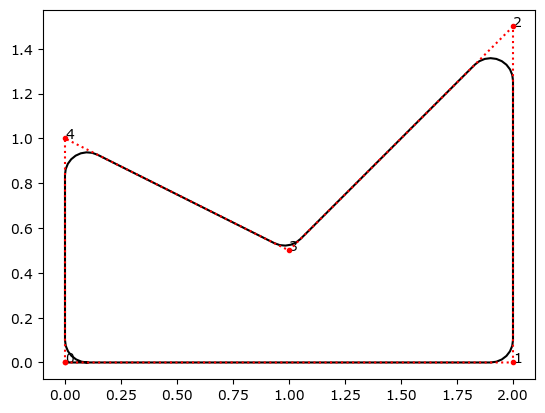

In [71]:
polygon=np.array([0+0j,2+0j,2+1.5j,1+0.5j,0+1j])
n=len(polygon)
loop=np.arange(n+1)%n#add last point to the end
plt.plot(polygon[loop].real,polygon[loop].imag,'r.:',zorder=5)
for i, p in enumerate(polygon):
    plt.annotate(f'{i}', (p.real, p.imag))
    pass
turtlePath=list(polygon2TurtlePath(polygon,r=np.array([0.1,0.1,0.1,0.1,0.1]),max_cutoff_ratio=np.array([0.5,0.5,0.5,0.5,0.5]),from_startpoint=True))
p0,p1=polygon[:2]
phs=np.array(list(turtlePath2Points(turtlePath,p0=p0,a0=p1-p0,offs=0.0,tol=0.001,return_start=True) ))
plt.gca().set_aspect('equal') 
plt.plot(phs.real,phs.imag,'k-',zorder=1);

In [56]:
 np.zeros_like(polygon,dtype=bool)|[True,False,False,True,True]

array([ True, False, False,  True,  True])